In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 数据预处理步骤
# 读取 Excel 文件
excel_file_path = 'data.xls'
df = pd.read_excel(excel_file_path)
columns_to_drop = ['班级','姓名','性别']
df.drop(columns=columns_to_drop, inplace=True)
# 将特定异常值（例如0）替换为NaN
df.replace(0, pd.NA, inplace=True)
# 删除包含NaN的行
df = df.dropna()
df = df.convert_dtypes()

In [3]:
# 将1000米的str型数据转换为数值型
temp = df['1000米'].str.split('\'', expand=True).fillna(0) # 返回值为一个DataFrame
df['1000米'] = pd.to_numeric(temp[0])*60+pd.to_numeric(temp[1])
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 431 entries, 0 to 475
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1000米   431 non-null    int64  
 1   50米     431 non-null    Float64
 2   跳远      431 non-null    Float64
 3   体前屈     431 non-null    Int64  
 4   引体      431 non-null    Int64  
 5   肺活量     431 non-null    Int64  
 6   身高      431 non-null    Float64
 7   体重      431 non-null    Float64
dtypes: Float64(4), Int64(3), int64(1)
memory usage: 33.3 KB
None


,1000米,50米,跳远,体前屈,引体,肺活量,身高,体重
0,253,8.88,195.0,12,1,2785,170.0,72.6
1,256,7.7,225.0,11,7,3133,174.0,52.7
2,249,8.45,218.0,14,1,3901,169.0,46.5
3,261,8.05,206.0,13,1,4946,183.0,79.7
4,224,7.52,210.0,13,9,3538,171.0,54.7


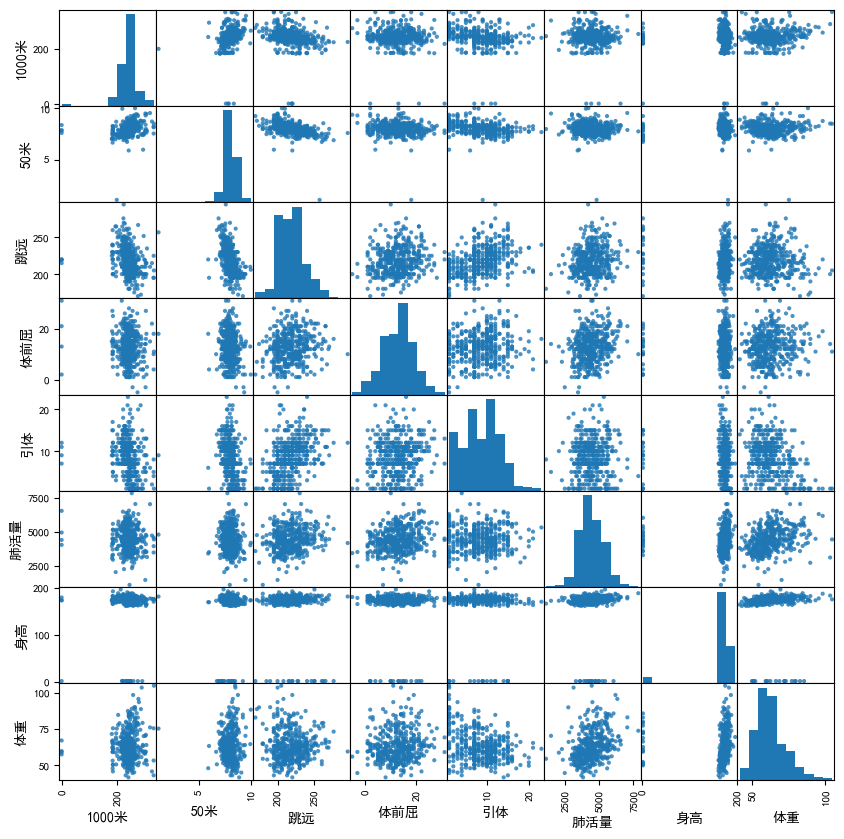

In [4]:
# 绘制散点图矩阵
pd.plotting.scatter_matrix(df,alpha=0.8,figsize=(10,10),diagonal='hist')
plt.show()

In [5]:
# 对dataframe中数据类型进行转换
print(df.dtypes)
df = df.astype(float)
print(df.dtypes)

1000米      int64
50米      Float64
跳远       Float64
体前屈        Int64
引体         Int64
肺活量        Int64
身高       Float64
体重       Float64
dtype: object
1000米    float64
50米      float64
跳远       float64
体前屈      float64
引体       float64
肺活量      float64
身高       float64
体重       float64
dtype: object


In [6]:
df.describe()

,1000米,50米,跳远,体前屈,引体,肺活量,身高,体重
count,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000
mean,240.461717,8.001833,218.190255,12.747100,8.535963,4410.744780,166.331763,62.808585
std,34.573855,0.621169,18.614973,5.911643,4.282792,882.072936,35.823574,10.300754
min,0.000000,1.050000,170.000000,-5.000000,1.000000,1072.000000,1.620000,41.600000
25%,229.000000,7.690000,205.000000,9.000000,6.000000,3801.000000,170.000000,55.500000
50%,241.000000,8.020000,216.000000,13.000000,8.000000,4353.000000,173.000000,61.100000
75%,254.000000,8.280000,230.000000,17.000000,11.000000,4957.500000,177.000000,67.650000
max,333.000000,10.020000,295.000000,31.000000,23.000000,7852.000000,196.000000,104.700000


In [7]:
# 由数据散点图看出应该使用spearman相关系数分析
from scipy.stats import spearmanr
# 计算Spearman相关系数矩阵
correlation_matrix, p = spearmanr(df)
# 打印结果
print("Spearman相关系数矩阵:")
print(correlation_matrix)
print("p值矩阵：")
print(p)

Spearman相关系数矩阵:
[[ 1.          0.39974593 -0.3675095  -0.05087536 -0.3761226  -0.07385823
  -0.10508838  0.07273004]
 [ 0.39974593  1.         -0.51292865 -0.09460524 -0.37755504 -0.09041154
  -0.06680014 -0.00741955]
 [-0.3675095  -0.51292865  1.          0.16741781  0.44244517  0.16259557
   0.15843048  0.04160114]
 [-0.05087536 -0.09460524  0.16741781  1.          0.11615084  0.19644878
  -0.02289361  0.12003788]
 [-0.3761226  -0.37755504  0.44244517  0.11615084  1.          0.01665077
  -0.11059544 -0.26285592]
 [-0.07385823 -0.09041154  0.16259557  0.19644878  0.01665077  1.
   0.27217273  0.40767912]
 [-0.10508838 -0.06680014  0.15843048 -0.02289361 -0.11059544  0.27217273
   1.          0.35118283]
 [ 0.07273004 -0.00741955  0.04160114  0.12003788 -0.26285592  0.40767912
   0.35118283  1.        ]]
p值矩阵：
[[0.00000000e+00 5.74071751e-18 3.14126503e-15 2.91967556e-01
  6.23674875e-16 1.25775499e-01 2.91539196e-02 1.31675624e-01]
 [5.74071751e-18 0.00000000e+00 2.70576422e-30 4.967

In [8]:
df.columns

Index(['1000米', '50米', '跳远', '体前屈', '引体', '肺活量', '身高', '体重'], dtype='object')

In [65]:
# # 定义一个函数来生成标注文本
# def get_annot_text(corr, p_value):
#     if p_value < 0.05:  # 以0.05作为显著性水平
#         return f"{corr:.2f}\n*"
#     else:
#         return f"{corr:.2f}"

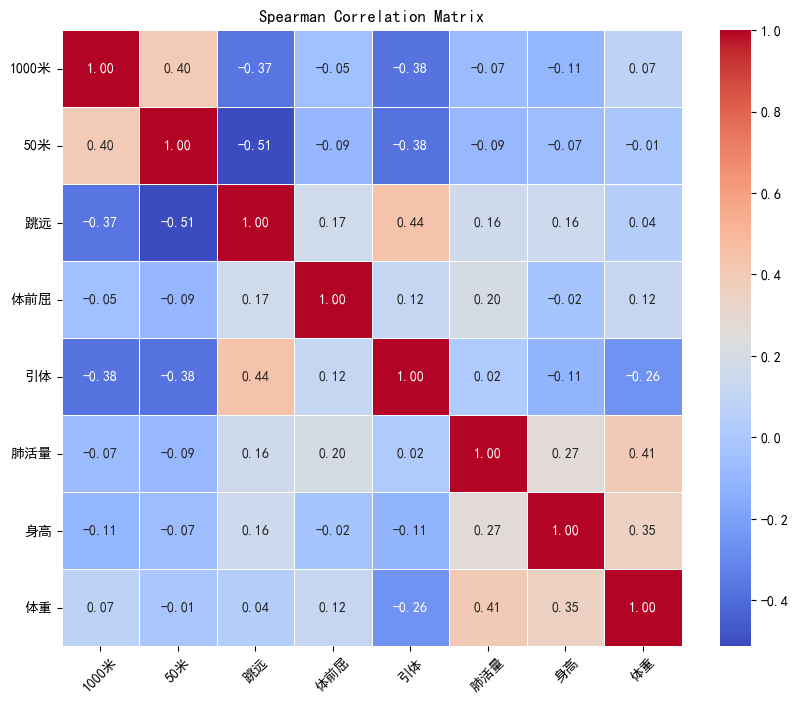

In [9]:
# 热力图展示相关系数矩阵
import seaborn as sns
# 设置图形大小
plt.figure(figsize=(10, 8))
# 绘制热力图
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
# 热力图标签
columns_name=df.columns.tolist()
# 设置 x 轴和 y 轴的刻度标签位置
xticks_pos = [i + 0.5 for i in range(len(columns_name))]
yticks_pos = [i + 0.5 for i in range(len(columns_name))]
# 设置 x 轴和 y 轴的刻度标签
plt.xticks(ticks=xticks_pos, labels=columns_name, ha='center', rotation=45)
plt.yticks(ticks=xticks_pos, labels=columns_name, va='center', rotation=0)
# 设置图形标题
plt.title('Spearman Correlation Matrix')
# 显示图形
plt.show()